# Die Plotversuche

In [1]:
%matplotlib inline
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import numpy as np
import requests, zipfile, io #zum abspeichern von PDFs
from tqdm import tqdm # Anzeigen des aktuellen Ladestandes
import PyPDF2
import re
from os import listdir
from os.path import isfile, join
import locale
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv("KRFrames/df_tuti_Ganzes_Frame")

In [11]:
df1= df[["VorlageNR", "Geschäft", "Namenganz", "P", "Einreichedatum"]]

In [12]:
df1

,VorlageNR,Geschäft,Namenganz,P,Einreichedatum
0,3020,Postulat von Luzian Franzini und Esther Haas b...,Luzian Franzini,ALG,2019-10-11
1,3020,Postulat von Luzian Franzini und Esther Haas b...,Esther Haas,ALG,2019-10-11
2,3019,"Motion von Luzian Franzini, Rita Hofer, Tabea ...",Luzian Franzini,ALG,2019-10-11
3,3019,"Motion von Luzian Franzini, Rita Hofer, Tabea ...",Rita Hofer,ALG,2019-10-11
4,3019,"Motion von Luzian Franzini, Rita Hofer, Tabea ...",Tabea Zimmermann Gibson,ALG,2019-10-11
...,...,...,...,...,...
1988,762,Motion der erweiterten Justizprüfungskommissio...,NaN,NaN,2005-10-31
1989,666,Motion der Kommission Teilrevision Personalges...,NaN,NaN,2002-06-06
1990,304,Motion von Manuela Weichelt betreffend HIV-Prä...,Manuela Weichelt,ALG,2003-05-27
1991,282,Motion von Christoph Hohler betreffend Radstre...,Christoph Hohler,SP,NaN


In [13]:
df11=df1["Einreichedatum"].sort_values().head(1804)

In [14]:
df1.groupby("VorlageNR")["Einreichedatum"].value_counts()

VorlageNR  Einreichedatum
81         2007-04-10        1
304        2003-05-27        1
666        2002-06-06        1
762        2005-10-31        1
801        2006-08-22        1
                            ..
3014       2019-09-26        1
3017       2019-10-06        3
3018       2019-10-07        3
3019       2019-10-11        5
3020       2019-10-11        2
Name: Einreichedatum, Length: 1117, dtype: int64

In [15]:
#Index ist zwar im Datetime64-Format aber er verlangt DatetimeIndex.
df2=df1.set_index(pd.DatetimeIndex(df1["Einreichedatum"]).date)
df2

,VorlageNR,Geschäft,Namenganz,P,Einreichedatum
2019-10-11,3020,Postulat von Luzian Franzini und Esther Haas b...,Luzian Franzini,ALG,2019-10-11
2019-10-11,3020,Postulat von Luzian Franzini und Esther Haas b...,Esther Haas,ALG,2019-10-11
2019-10-11,3019,"Motion von Luzian Franzini, Rita Hofer, Tabea ...",Luzian Franzini,ALG,2019-10-11
2019-10-11,3019,"Motion von Luzian Franzini, Rita Hofer, Tabea ...",Rita Hofer,ALG,2019-10-11
2019-10-11,3019,"Motion von Luzian Franzini, Rita Hofer, Tabea ...",Tabea Zimmermann Gibson,ALG,2019-10-11
...,...,...,...,...,...
2005-10-31,762,Motion der erweiterten Justizprüfungskommissio...,NaN,NaN,2005-10-31
2002-06-06,666,Motion der Kommission Teilrevision Personalges...,NaN,NaN,2002-06-06
2003-05-27,304,Motion von Manuela Weichelt betreffend HIV-Prä...,Manuela Weichelt,ALG,2003-05-27
NaN,282,Motion von Christoph Hohler betreffend Radstre...,Christoph Hohler,SP,NaN


In [16]:
df3=df2.sort_index().head(1804)#Hier sortiere ich den Index, um ihn verwenden zu können
# und nehme die vordersten 1804, weil die anderen NAN sind.

In [17]:
df3

,VorlageNR,Geschäft,Namenganz,P,Einreichedatum
1982-12-16,1223,"Motion von Karl Betschart, Andrea Hodel und Be...",Karl Betschart,SVP,1982-12-16
1982-12-16,1223,"Motion von Karl Betschart, Andrea Hodel und Be...",Andrea Hodel,FDP,1982-12-16
1982-12-16,1223,"Motion von Karl Betschart, Andrea Hodel und Be...",Beat Villiger,CVP,1982-12-16
1998-01-29,1201,Motion der FDP-Fraktion betreffend Einführungs...,FDP-Fraktion,FDP,1998-01-29
1998-10-27,1016,Postulat von René Bär betreffend Ungültigerklä...,René Bär,SVP,1998-10-27
...,...,...,...,...,...
2019-10-11,3019,"Motion von Luzian Franzini, Rita Hofer, Tabea ...",Tabea Zimmermann Gibson,ALG,2019-10-11
2019-10-11,3019,"Motion von Luzian Franzini, Rita Hofer, Tabea ...",Rita Hofer,ALG,2019-10-11
2019-10-11,3019,"Motion von Luzian Franzini, Rita Hofer, Tabea ...",Luzian Franzini,ALG,2019-10-11
2019-10-11,3020,Postulat von Luzian Franzini und Esther Haas b...,Esther Haas,ALG,2019-10-11


In [18]:
df3.index= pd.to_datetime(df3.index) #nun den Index in datetime umwalndeln

In [19]:
df3["Geschäft"].resample("M").count()

1982-12-31     3
1983-01-31     0
1983-02-28     0
1983-03-31     0
1983-04-30     0
              ..
2019-06-30     9
2019-07-31     9
2019-08-31    13
2019-09-30    14
2019-10-31    13
Freq: M, Name: Geschäft, Length: 443, dtype: int64

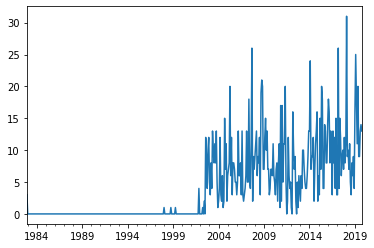

In [20]:
df3["Geschäft"].resample("M").count().plot() #hier der Plot mit mehrfachnennungen

In [22]:
df4=df3.sort_values("P") #bin nicht sicher obs das braucht

In [28]:
#Aaahhh ich brauche hier ja nur die einzelnen Vorlagen, nicht die einzelnen Parteien.
df5=df4.drop_duplicates(subset=['VorlageNR', 'Geschäft'], keep=False)

In [29]:
df5.sort_index()

,VorlageNR,Geschäft,Namenganz,P,Einreichedatum
1998-01-29,1201,Motion der FDP-Fraktion betreffend Einführungs...,FDP-Fraktion,FDP,1998-01-29
1998-10-27,1016,Postulat von René Bär betreffend Ungültigerklä...,René Bär,SVP,1998-10-27
1999-04-18,2182,Kleine Anfrage von Thomas Aeschi betreffend Un...,Thomas Aeschi,SVP,1999-04-18
2001-11-29,974,Motion der Justizprüfungskommission betreffend...,NaN,NaN,2001-11-29
2002-04-23,1008,Motion der CVP-Fraktion betreffend Gewährung e...,CVP-Fraktion,CVP,2002-04-23
...,...,...,...,...,...
2019-07-15,2999,Motion der FDP-Fraktion betreffend mehr Kompet...,FDP-Fraktion,FDP,2019-07-15
2019-08-16,3004,Motion der CVP-Fraktion betreffend bedarfsgere...,CVP-Fraktion,CVP,2019-08-16
2019-09-08,3007,Interpellation der SP-Fraktion betreffend Pest...,SP-Fraktion,SP,2019-09-08
2019-09-23,3013,Interpellation der SP-Fraktion betreffend Wohn...,SP-Fraktion,SP,2019-09-23


# Ergebnisse
nun scheint es endlich zu stimmen. Mal schauen wie es aussieht.

In [30]:
df5["Geschäft"].resample("M").count()

1998-01-31    1
1998-02-28    0
1998-03-31    0
1998-04-30    0
1998-05-31    0
             ..
2019-05-31    7
2019-06-30    2
2019-07-31    4
2019-08-31    1
2019-09-30    3
Freq: M, Name: Geschäft, Length: 261, dtype: int64

# Hier das Ergebnis
Zahlen 2009 weisen (Wahljahre 2010/2011) nicht auf eine solche Veränderung hin. Die Zahlen für die Wahljahre 14/15 und 18/19 hingegen schon.
HMMM oder doch nicht - das Resutat scheint nicht so klar

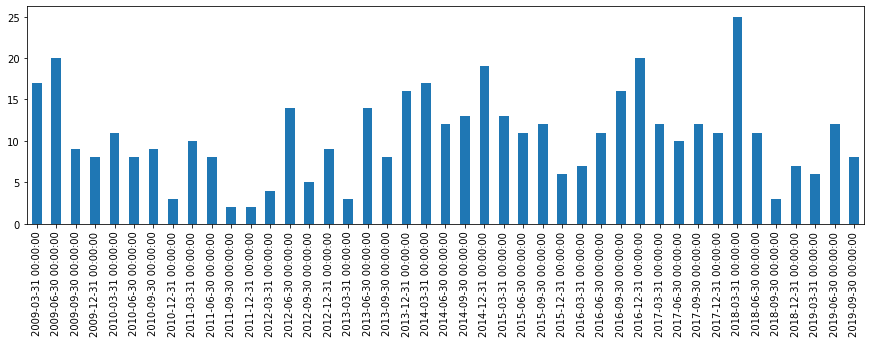

In [42]:

df5["Geschäft"].resample("Q").count()["2009":].plot(figsize=(15,4), kind="bar")